In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

### How many years have been "Batman years", with more Batman characters than Superman characters?

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

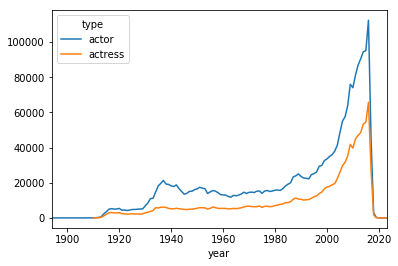

In [5]:
c = cast.groupby(['year','type']).size().unstack('type')
c.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

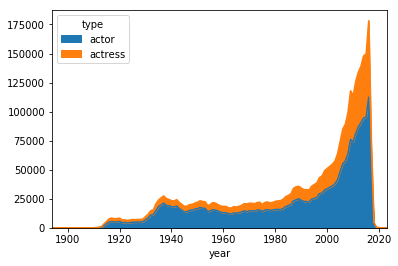

In [6]:
c.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

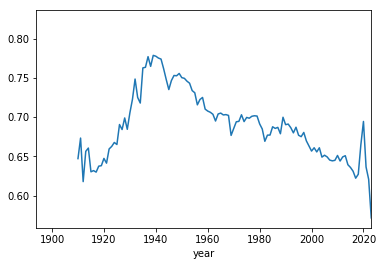

In [7]:
(c.actor/(c.actor+c.actress)).plot()

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

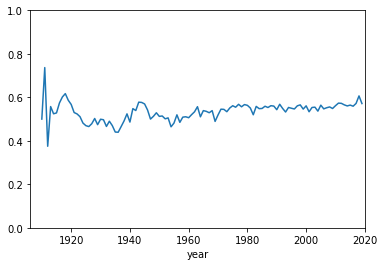

In [9]:
c2 = cast[cast.n==2].groupby(['year','type']).size().unstack('type')
(c2.actor/(c2.actor+c2.actress)).plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    NaN      1.0
1907 1.0    1.0      NaN
     2.0    1.0      NaN
n          1.0       2.0  3.0
year                         
1906  0.666667  0.666667  NaN
1907       NaN       NaN  NaN
1908       NaN       NaN  NaN
1909       NaN       NaN  NaN
1910  0.200000  0.500000  NaN


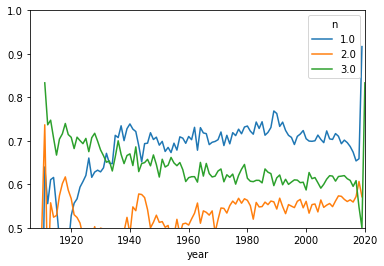

In [15]:
c3 = cast[cast.n<=3].groupby(['year','type','n']).size().unstack(['type'])
print(c3.head())
c4 = (c3.actor/(c3.actor + c3.actress)).unstack('n')
print(c4.head())
c4.plot(ylim = [0.5,1])